#### 概率统计

利用朴素贝叶斯算法过滤垃圾短信

#### 基于黑名单的过滤器

维护一个骚扰电话号码和垃圾短信发送号码的黑名单。
* 这个黑名单的收集，有很多途径，比如，可以从一些公开的网站上下载；也可以通过类似“360 骚扰电话拦截”的功能通过用户自主标记骚扰电话来收集。对于被多个用户标记，并且标记个数超过一定阈值的号码，我们就可以定义为骚扰电话，并将它加入到我们的黑名单中。

##### 黑名单存储

内存存储黑名单
* 假设手机号码以字符串的方式存储，平均长度为16
  * 散列表
    * 存储50w个，大约需要10MB空间，尚可
    * 存储500w个，需要100MB，对手机来说过大
  * 布隆过滤器 （！！！有判错的概率！！！）
    * 500w个手机号，位图大小设置为10倍，即5000w，需要5000万个二进制位（5000w bits）-> 7MB，消耗内存更小

服务器存储
* 可以把黑名单存储在服务器端上，把过滤和拦截的核心工作，交给服务器端来做。
* 手机端只负责将要检查的号码发送给服务器端，服务器端通过查黑名单，判断这个号码是否应该被拦截，并将结果返回给手机端。
* 用这个解决思路完全不需要占用手机内存。
* 不过，有利就有弊。网络通信是比较慢的，网络延迟就会导致处理速度降低。而且，这个方案还有个硬性要求，那就是只有在联网的情况下，才能正常工作


#### 基于规则的过滤器

如果某个垃圾短信发送者的号码并不在黑名单中，那这种方法就没办法拦截了

垃圾短信
* 对于垃圾短信来说，我们还可以通过短信的内容，来判断某条短信是否是垃圾短信。
* 我们预先设定一些规则，如果某条短信符合这些规则，我们就可以判定它是垃圾短信。
* 实际上，规则可以有很多，比如下面这几个：
  * 短信中包含特殊单词（或词语），比如一些非法、淫秽、反动词语等；
  * 短信发送号码是群发号码，非我们正常的手机号码，比如 +60389585；
  * 短信中包含回拨的联系方式，比如手机号码、微信、QQ、网页链接等，因为群发短信的号码一般都是无法回拨的；
  * 短信格式花哨、内容很长，比如包含各种表情、图片、网页链接等；
  * 符合已知垃圾短信的模板。垃圾短信一般都是重复群发，对于已经判定为垃圾短信的短信，我们可以抽象成模板，将获取到的短信与模板匹配，一旦匹配，我们就可以判定为垃圾短信。
* 如果短信只是满足其中一条规则，如果就判定为垃圾短信，那会存在比较大的误判的情况。可以综合多条规则进行判断。比如，满足 2 条以上才会被判定为垃圾短信；或者每条规则对应一个不同的得分，满足哪条规则，我们就累加对应的分数，某条短信的总得分超过某个阈值，才会被判定为垃圾短


特殊单词
* 大量标记好的样本数据（eg 1000w条短信），进行分词处理，去掉”的、得“等没有意义的 停用词（Stop Words），针对分词，同级垃圾短信中的出现的频率

#### 基于概率的过滤器

基于规则的过滤器，看起来很直观，也很好理解，但是它也有一定的局限性。
* 这些规则受人的思维方式局限，规则未免太过简单；
* 垃圾短信发送者可能会针对规则，精心设计短信，绕过这些规则的拦截

##### 朴素贝叶斯算法


假设事件 A 是“小明不去上学”，事件 B 是“下雨了”。我们现在统计了一下过去 10 天的下雨情况和小明上学的情况，作为样本数据。
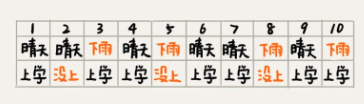

这 10 天中
* 有 4 天下雨，所以下雨的概率 P(B)=4/10
* 10 天中有 3 天，小明没有去上学，所以小明不去上学的概率 P(A)=3/10
* 在 4 个下雨天中，小明有 2 天没去上学，所以下雨天不去上学的概率 P(A|B)=2/4
* 在小明没有去上学的 3 天中，有 2 天下雨了，所以小明因为下雨而不上学的概率是 P(B|A)=2/3
实际上，这 4 个概率值之间，有一定的关系，这个关系就是朴素贝叶斯算法

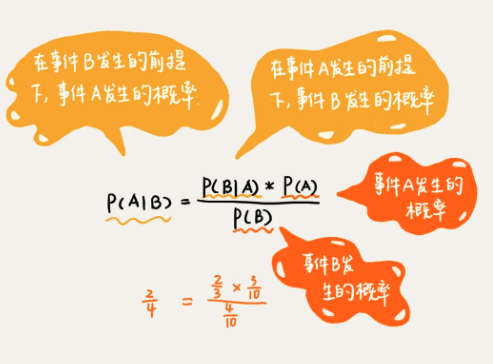

* 需要把短信抽象成一组计算机可以理解并且方便计算的特征项，用这一组特征项代替短信本身
* 通过分词算法，把一个短信分割成 n 个单词。这 n 个单词就是一组特征项，全权代表这个短信
* 判定一个短信是否是垃圾短信这样一个问题，就变成了，判定同时包含这几个单词的短信是否是垃圾短信。
* 这里并不像基于规则的过滤器那样，一个短信要么被判定为垃圾短信、要么被判定为非垃圾短息。使用概率，来表征一个短信是垃圾短信的可信程度
* 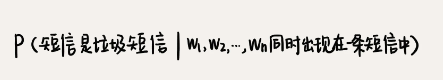
* 那就是样本的数量再大，毕竟也是有限的，样本中不会有太多同时包含 W1​，W2​，W3​，…，Wn​ 的短信的，甚至很多时候，样本中根本不存在这样的短信
* 通过朴素贝叶斯公式，将这个概率的求解，分解为其他三个概率的求解
  

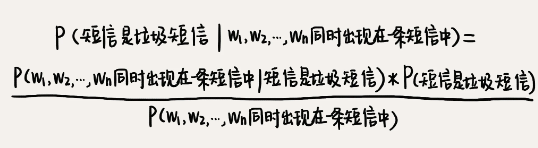
  * P（W1​，W2​，W3​，…，Wn​ 同时出现在一条短信中 | 短信是垃圾短信）这个概率照样无法通过样本来统计得到。但是我们可以基于下面这条著名的概率规则来计算。
    * 独立事件发生的概率计算公式：P(A*B) = P(A)*P(B)
    * 如果事件 A 和事件 B 是独立事件，两者的发生没有相关性，事件 A 发生的概率 P(A) 等于 p1，事件 B 发生的概率 P(B) 等于 p2，那两个同时发生的概率 P(A*B) 就等于 P(A)*P(B)。
  * 基于这条独立事件发生概率的计算公式，我们可以把 P（W1，W2，W3，…，Wn 同时出现在一条短信中 | 短信是垃圾短信）分解为下面这个公式：
  * 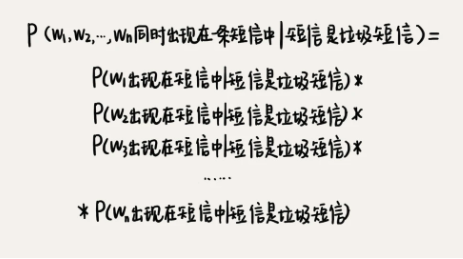
    * 其中，P（Wi​ 出现在短信中 | 短信是垃圾短信）表示垃圾短信中包含 Wi​ 这个单词的概率有多大。这个概率值通过统计样本很容易就能获得。我们假设垃圾短信有 y 个，其中包含 Wi​ 的有 x 个，那这个概率值就等于 x/y。
    * P（W1​，W2​，W3​，…，Wn​ 同时出现在一条短信中 | 短信是垃圾短信）这个概率值，我们就计算出来了，我们再来看下剩下两个。
    * P（短信是垃圾短信）表示短信是垃圾短信的概率，这个很容易得到。我们把样本中垃圾短信的个数除以总样本短信个数，就是短信是垃圾短信的概率。
    * 不过，P（W1​，W2​，W3​，…，Wn​ 同时出现在一条短信中）这个概率还是不好通过样本统计得到，原因我们前面说过了，样本空间有限。不过，我们没必要非得计算这一部分的概率值。为什么这么说呢？
  * 实际上，我们可以分别计算同时包含 W1​，W2​，W3​，…，Wn​ 这 n 个单词的短信，是垃圾短信和非垃圾短信的概率。假设它们分别是 p1 和 p2。我们并不需要单纯地基于 p1 值的大小来判断是否是垃圾短信，而是通过对比 p1 和 p2 值的大小，来判断一条短信是否是垃圾短信。更细化一点讲，那就是，如果 p1 是 p2 的很多倍（比如 10 倍），我们才确信这条短信是垃圾短信。
  * 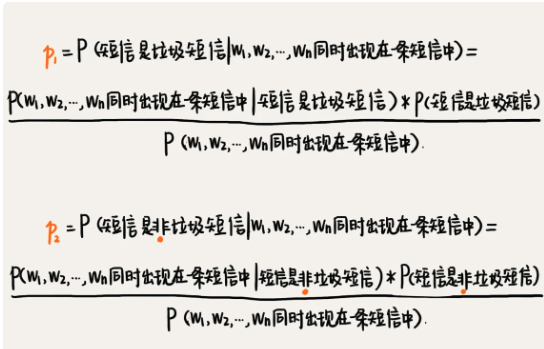
  * 基于这两个概率的倍数来判断是否是垃圾短信的方法，我们就可以不用计算 P（W1​，W2​，W3​，…，Wn​ 同时出现在一条短信中）这一部分的值了，因为计算 p1 与 p2 的时候，都会包含这个概率值的计算，所以在求解 p1 和 p2 倍数（p1/p2）的时候，我们也就不需要这个值。